## Exploratory Data analysis

### Navigation
* [README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md)
* [Clean data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/cleaned_data.csv)
* [Raw data](https://github.com/Kaori61/crime-data-analysis/blob/main/dataset/raw_data.csv)
* [ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb)
* [Statistical analysis](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/statistical_analysis.ipynb)
* [Dashboard - Business Crime Trends in London](https://public.tableau.com/views/LondonBusinessCrimeAnalysis/Dashboard1?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

### Import libraries and load data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# load dataset
df = pd.read_csv('../dataset/data_cleaned.csv')
df.head()

,Date,Borough,Crime Section,Crime group,Outcome,Positive Outcome,Outcome Count,Year,Month,Weekday
0,2024-06-10,Southwark,DRUG OFFENCES,POSSESSION OF DRUGS,Charged/Summonsed/Postal Requisition,Y,1,2024,6,Monday
1,2024-09-04,Lewisham,PUBLIC ORDER OFFENCES,PUBLIC FEAR ALARM OR DISTRESS,Investigation Complete; No Suspect Identified....,N,1,2024,9,Wednesday
2,2023-06-08,Islington,THEFT,SHOPLIFTING,Investigation Complete; No Suspect Identified....,N,18,2023,6,Thursday
3,2024-03-17,Newham,THEFT,SHOPLIFTING,Investigation Complete; No Suspect Identified....,N,3,2024,3,Sunday
4,2024-05-25,Lambeth,DRUG OFFENCES,POSSESSION OF DRUGS,Community resolution (Crime),Y,7,2024,5,Saturday


### Check the data structure

In [3]:
# check for data types
df.dtypes

Date                object
Borough             object
Crime Section       object
Crime group         object
Outcome             object
Positive Outcome    object
Outcome Count        int64
Year                 int64
Month                int64
Weekday             object
dtype: object

I will convert Date and Refresh date into datetime structure

In [4]:
# convert into date format
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Borough                     object
Crime Section               object
Crime group                 object
Outcome                     object
Positive Outcome            object
Outcome Count                int64
Year                         int64
Month                        int64
Weekday                     object
dtype: object

In [5]:
# Overview statistical summary of data
df.describe(include=['object','int64'])

,Borough,Crime Section,Crime group,Outcome,Positive Outcome,Outcome Count,Year,Month,Weekday
count,40159,40159,40159,40159,40159,40159.000000,40159.000000,40159.000000,40159
unique,32,12,30,31,2,NaN,NaN,NaN,7
top,Westminster,THEFT,VIOLENCE WITHOUT INJURY,Investigation Complete; No Suspect Identified....,N,NaN,NaN,NaN,Wednesday
freq,2323,11369,5264,18632,35582,NaN,NaN,NaN,6319
mean,NaN,NaN,NaN,NaN,NaN,2.241415,2023.509201,6.663811,NaN
std,NaN,NaN,NaN,NaN,NaN,3.774861,0.499922,3.518140,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,2023.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,2023.000000,4.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,2024.000000,7.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,2024.000000,10.000000,NaN


In [6]:
# check the proportion of the value in each column
for col in df.select_dtypes(include='object').columns:
    print(f"\n Normalised value counts for: '{col}'")
    normalised_counts = df[col].value_counts(normalize=True)*100
    for category, percentage in normalised_counts.items():
         print(f"  {category}: {percentage:.2f}%")
    


 Normalised value counts for: 'Borough'
  Westminster: 5.78%
  Newham: 4.15%
  Camden: 4.07%
  Tower Hamlets: 3.91%
  Lambeth: 3.88%
  Brent: 3.72%
  Hackney: 3.71%
  Southwark: 3.69%
  Islington: 3.56%
  Wandsworth: 3.43%
  Hillingdon: 3.42%
  Ealing: 3.42%
  Lewisham: 3.39%
  Croydon: 3.38%
  Greenwich: 3.34%
  Haringey: 3.31%
  Barnet: 3.13%
  Enfield: 3.03%
  Redbridge: 3.02%
  Hammersmith and Fulham: 3.00%
  Hounslow: 2.98%
  Bromley: 2.92%
  Waltham Forest: 2.62%
  Kensington and Chelsea: 2.58%
  Havering: 2.58%
  Barking and Dagenham: 2.55%
  Harrow: 2.14%
  Kingston upon Thames: 2.08%
  Merton: 2.04%
  Bexley: 1.89%
  Sutton: 1.70%
  Richmond upon Thames: 1.56%

 Normalised value counts for: 'Crime Section'
  THEFT: 28.31%
  VIOLENCE AGAINST THE PERSON: 22.46%
  PUBLIC ORDER OFFENCES: 10.53%
  VEHICLE OFFENCES: 7.73%
  ARSON AND CRIMINAL DAMAGE: 7.66%
  BURGLARY: 7.01%
  ROBBERY: 6.13%
  DRUG OFFENCES: 4.52%
  SEXUAL OFFENCES: 3.09%
  MISCELLANEOUS CRIMES AGAINST SOCIETY: 1.53

This shows distribution of crime count in each column.

### Visualise distributions

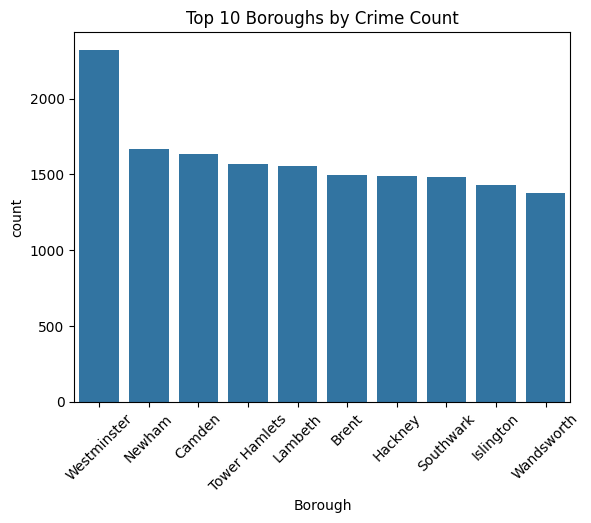

In [7]:
# create bar chart for top 10 crime count Boroughs
top_boroughs = df['Borough'].value_counts().nlargest(10).index

sns.countplot(data=df[df['Borough'].isin(top_boroughs)], x='Borough', 
              order=top_boroughs)
plt.xticks(rotation=45)
plt.title('Top 10 Boroughs by Crime Count')
plt.show()

Westminster has the highest crime count.

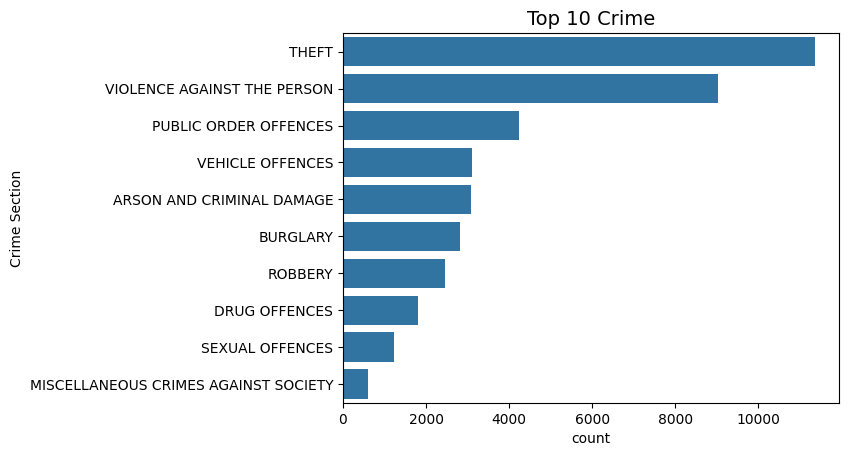

In [8]:
# create bar chart for top 10 Crime Section
top_crime_section = df['Crime Section'].value_counts().nlargest(10).index

cs = sns.countplot(data=df[df['Crime Section'].isin(top_crime_section)],  y='Crime Section', 
              order=top_crime_section)

cs.set_title('Top 10 Crime', fontsize=14, loc = 'center')
plt.show()

Theft is the most common crime of all.

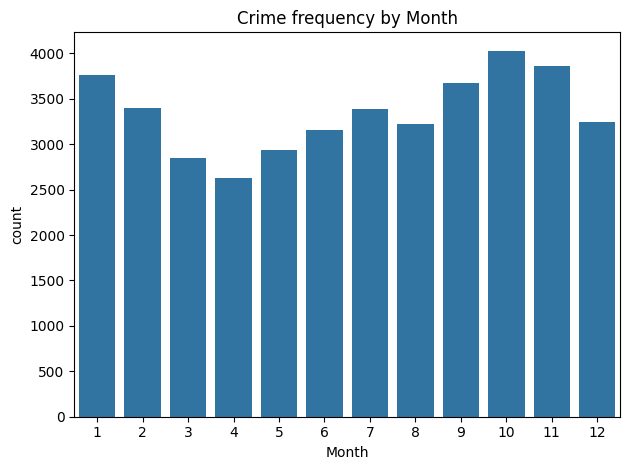

In [9]:
# create graph for crime frequency by month
sns.countplot(data=df, x='Month')
plt.title('Crime frequency by Month')
plt.tight_layout()
plt.show()

October is the most frequent criem occurence.

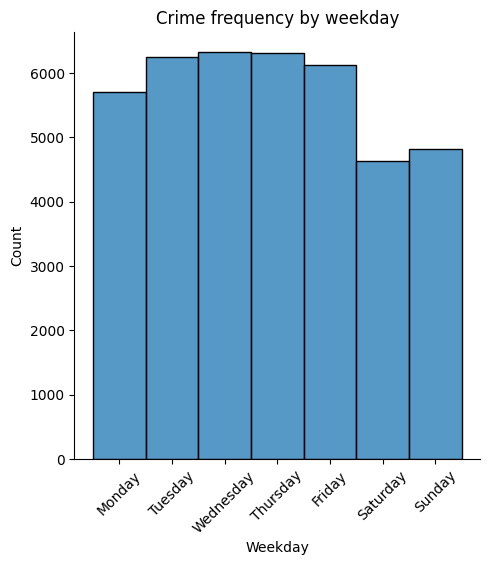

In [10]:
# sort Weekday in order
df['Weekday'] = pd.Categorical(df['Weekday'],
                               categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                               ordered=True)
# histgram for weekday
sns.displot(data=df, x="Weekday")
plt.title('Crime frequency by weekday')
plt.xticks(rotation=45)
plt.show()

Wednesday is the higest crime occurence in the week.

### Create contingency table from Crime Group and Positive Outcome

Comparing two categorical value. To assess which crime group have more positive outcome. Positive Outcome = Y means resolved crime through a formal or informal action taken.

In [11]:
# create cross-tab for crime section
ct = pd.crosstab(df['Crime Section'],df['Positive Outcome'])
ct_sorted = ct.sort_values(by='Y', ascending=False)
print(ct_sorted)

Positive Outcome                          N     Y
Crime Section                                    
DRUG OFFENCES                           669  1146
VIOLENCE AGAINST THE PERSON            8061   959
THEFT                                 10415   954
PUBLIC ORDER OFFENCES                  3881   348
BURGLARY                               2527   288
ARSON AND CRIMINAL DAMAGE              2793   283
POSSESSION OF WEAPONS                   197   188
ROBBERY                                2299   164
MISCELLANEOUS CRIMES AGAINST SOCIETY    511   104
SEXUAL OFFENCES                        1139   102
VEHICLE OFFENCES                       3066    38
FRAUD AND FORGERY                        24     3


Positive Outcome "Y" means the crime is handled successfully. Thsi graph is sorting out Positive Outcome column to see wich crime has been sorted successfully. Drug offense is the most common crime to be solved. 

In [12]:
# create cross-tab for crime group
ct = pd.crosstab(df['Crime group'],df['Positive Outcome'])
ct_sorted = ct.sort_values(by='Y', ascending=False)
print(ct_sorted)

Positive Outcome                          N     Y
Crime group                                      
POSSESSION OF DRUGS                     324  1093
SHOPLIFTING                            3930   759
VIOLENCE WITHOUT INJURY                4747   517
VIOLENCE WITH INJURY                   3312   436
CRIMINAL DAMAGE                        2583   272
BURGLARY BUSINESS AND COMMUNITY        1815   260
POSSESSION OF WEAPONS                   197   188
PUBLIC FEAR ALARM OR DISTRESS          2515   134
RACE OR RELIGIOUS AGG PUBLIC FEAR       980   118
OTHER THEFT                            3371   114
MISC CRIMES AGAINST SOCIETY             511   104
OTHER OFFENCES PUBLIC ORDER             380    95
ROBBERY OF BUSINESS PROPERTY            855    88
OTHER SEXUAL OFFENCES                   873    86
ROBBERY OF PERSONAL PROPERTY           1444    76
THEFT FROM THE PERSON                  2117    62
TRAFFICKING OF DRUGS                    345    53
BICYCLE THEFT                           997    19


Possesion of drugs is the most common crime group to be solved.

### Heatmap for Top 10 crime section vs Borough

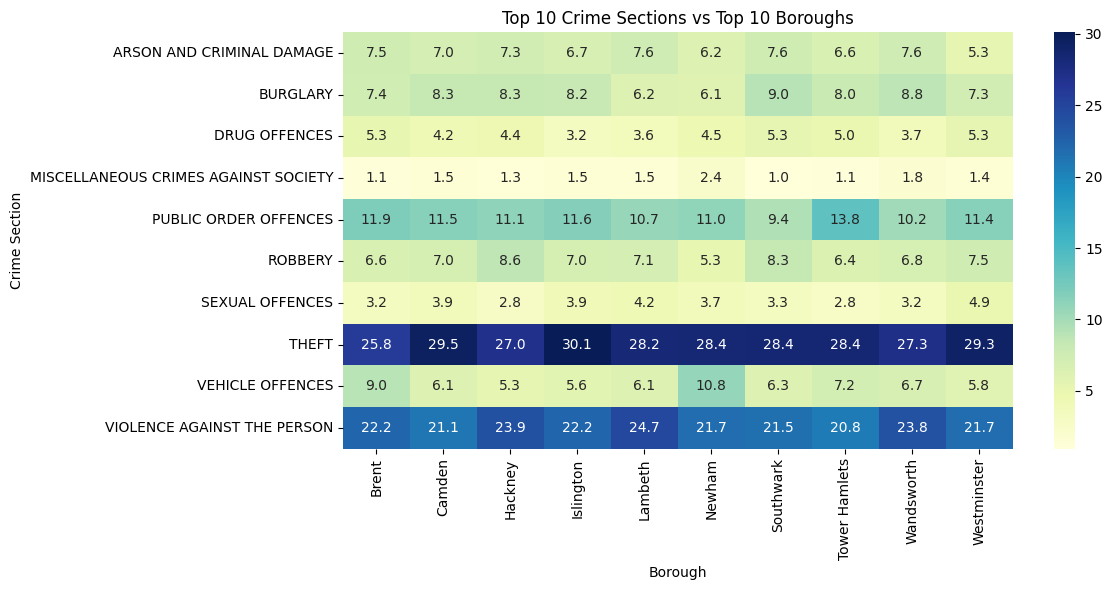

In [13]:
# filter the dataset. top_crime_section & top_boroughs shows top 10 results of those columns 
# that were created in the first two visualisation graphs.
filtered_df = df[df['Crime Section'].isin(top_crime_section) & df['Borough'].isin(top_boroughs)]

# heatmap Crime section vs Borough in normalised by column
heat_data = pd.crosstab(filtered_df['Crime Section'], filtered_df['Borough'], normalize='columns') * 100
plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Top 10 Crime Sections vs Top 10 Boroughs')
plt.ylabel('Crime Section')
plt.xlabel('Borough')
plt.tight_layout()
plt.show()

Each column is normalised so each column add up 100%. This heatmap shows common crime disctibution of cirme ocurrence in different borough. Every borough has similar trend in crimes.

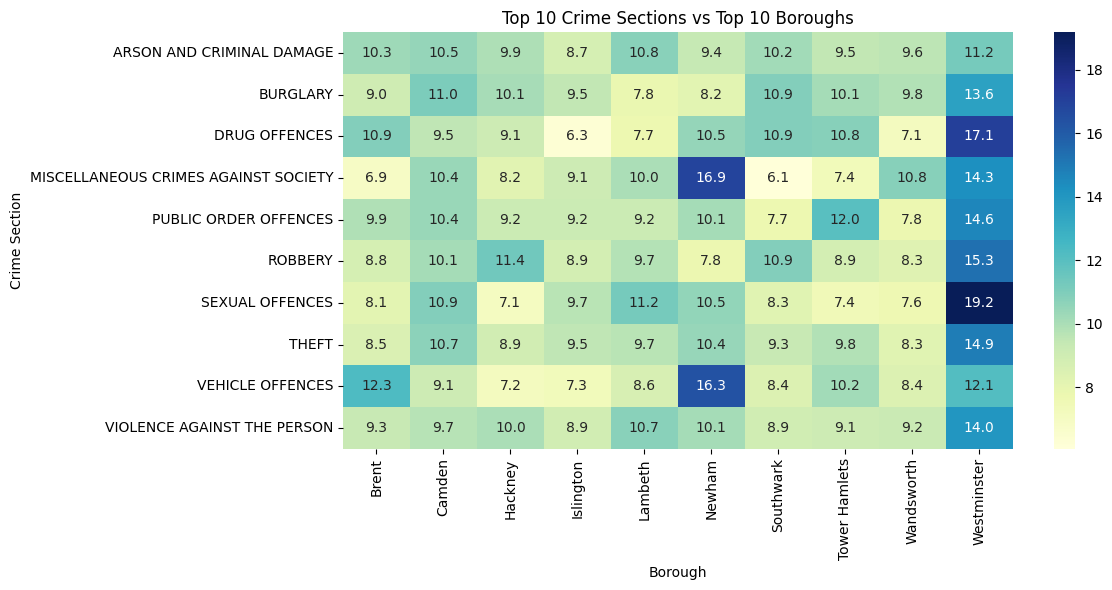

In [14]:
# heatmap Crime section vs Borough normalised by row
heat_data = pd.crosstab(filtered_df['Crime Section'], filtered_df['Borough'], normalize='index') * 100
plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Top 10 Crime Sections vs Top 10 Boroughs')
plt.ylabel('Crime Section')
plt.xlabel('Borough')
plt.tight_layout()
plt.show()

Each row is normalised so values add up to 100% per row. It tells distribution of crimes types. Hilligdon stands our for miscellaneous crimes against society.

This shows the count of each Crime Section in different Borough.

### Visualisation using Plotly

Frist, install nbformat in Jupyter Notebook

In [15]:
pip install nbformat >= 4.2.0

Note: you may need to restart the kernel to use updated packages.


### Crime Count by Borough over time

In [16]:
# Group by Date and Borough and count the number of occurrences
grouped = df.groupby(['Date', 'Borough']).size().reset_index(name='Count')

# Now plot
fig = px.line(grouped, x='Date', y='Count', color='Borough',
              title='Crime Count by Borough Over Time')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

From this graph at glance, it seems crime count is decreasing over the year.

### Case closure rate by Borough

In the column Positive Outcome "Y" means the crime case is closed. I will visualise the rate of closed case by different borough.

In [17]:
# create a new column called "Closed". Convert "Y"(closed case), "N"(open case).
df['Closed'] = df['Positive Outcome'].map({'Y': 1, 'N': 0})

# create data frame for visualisation
closure_rate = (
    df.groupby(['Date', 'Borough'])['Closed'] # groups the data for each day and borough
    .agg(['mean', 'count'])  # mean = closure rate, count = total cases
    .reset_index() # converts groupby result back to a DataFrame
    .rename(columns={'mean': 'ClosureRate', 'count': 'TotalCases'})
)

# create plotly visualisation
fig = px.line(closure_rate, x='Date', y='ClosureRate', color='Borough',
              title='Case Closure Rate by Borough Over Time')
fig.update_xaxes(rangeslider_visible=True)
fig.update_yaxes(title='Closure Rate', tickformat=".0%") 
fig.show()



There was a decrease in case closure rate from May 2024 to December 2024.

#### The next step taken is Statistical Analysis which can find from [here](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/statistical_analysis.ipynb).

Go back to [README](https://github.com/Kaori61/crime-data-analysis/blob/main/README.md) / [ETL pipleline](https://github.com/Kaori61/crime-data-analysis/blob/main/jupyter_notebooks/etl_pipeline.ipynb) / [Dashboard](https://public.tableau.com/views/LondonBusinessCrimeAnalysis/Dashboard1?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)